121
354 234 110 121


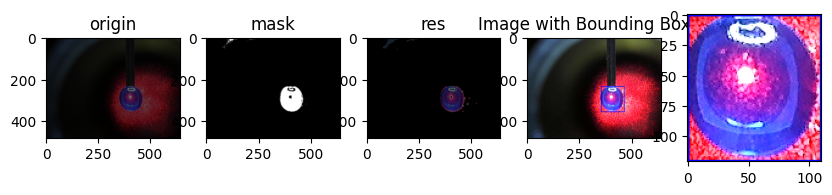

In [38]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt

url = r"D:\important_for_study_master\DoAn\New folder\data\test\230912"
folder = ['2C0','CO','COC2']
img = cv2.imread(url+"\\" +folder[0]+"\\1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.convertScaleAbs(img, 1, 0.4)
# Convert BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
# define range of blue color in HSV
lower_blue = np.array([15,50,45])
upper_blue = np.array([166,255,255])
# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)
mask = cv2.GaussianBlur(mask,(5,5),0)

# Create a mask for white and red colors
lower_white = np.array([0, 0, 255])
upper_white = np.array([255, 40, 255])
mask_white = cv2.inRange(hsv, lower_white, upper_white)

# Combine the blue and white masks to keep both blue and white/red areas
final_mask = cv2.bitwise_or(mask, mask_white)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(img,img, mask= final_mask)

fig,axs = plt.subplots(1, 5, figsize=(10,10))

axs[0].imshow(img)
axs[0].set(title = 'origin')

axs[1].imshow(mask,cmap='gray')
axs[1].set(title = 'mask')

axs[2].imshow(res)
axs[2].set(title = 'res')

ret,thresh = cv2.threshold(final_mask,127,255,0)

contours,hierachy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# Draw bounding boxes around the detected contours
img = cv2.convertScaleAbs(img, 1, 3)
img_with_boxes = img.copy()
for contour in contours:
    if cv2.contourArea(contour) > 250:
        [X, Y, W, H] = cv2.boundingRect(contour)
        if X > 100 and Y > 150 and H > 100:
            # Draw the bounding box on the image
            img_with_boxes = cv2.rectangle(img_with_boxes, (X, Y), (X + W, Y + H), (0, 0, 255), 2)
            print(max(W,H))
axs[3].imshow(img_with_boxes)
axs[3].set(title='Image with Bounding Boxes')
for contour in contours:
    if cv2.contourArea(contour) > 250:
        [X, Y, W, H] = cv2.boundingRect(contour)
        if X > 100 and Y > 150 and H>100: 
            print(X,Y,W,H)
            box=cv2.rectangle(img, (X, Y), (X + W, Y + H), (0,0,255), 2)
            roi = img[Y:Y+H, X:X+W]

plt.imshow(roi)